<a href="https://colab.research.google.com/github/joekibz/moringa-wk4/blob/main/Wk4_Thur_11_Nov_Project_Imbalanced_Classification_Project_%5BJoseph_Thiongo%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding

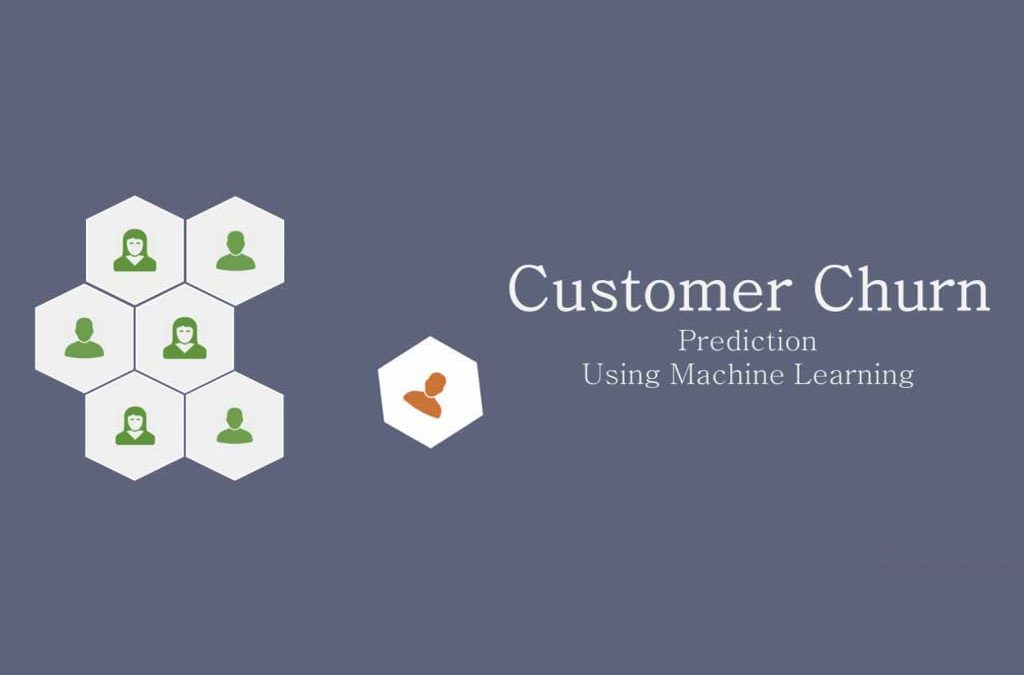

Beta Bank customers are leaving: little by little, chipping away every month. <br>The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.<br>
We need to predict whether a customer will leave the bank soon. <br>You have the data on
clients’ past behavior and termination of contracts with the bank.


#Project Evaluation

Below the evaluation criteria for the project: <br>
● How did you prepare the data for training? Have you processed all of the feature types?
<br>● Have you explained the preprocessing steps well enough?
<br>● How did you investigate the balance of classes?
<br>● Did you study the model without taking into account the imbalance of classes?
<br>● What are your findings of the task research?
<br>● Have you correctly split the data into sets?
<br>● How have you worked with the imbalance of classes?
<br>● Did you use at least two techniques for imbalance fixing?
<br>● Have you performed the model training, validation, and final testing correctly?
<br>● How high is your F1 score?
<br>● Did you examine the AUC-ROC values?
● Have you kept to the project structure and kept the code neat?

#Success Criteria 

Build a model with the maximum possible F1 score. <br> <b>To pass the project, you need an F1
score of at least 0.59.</b> <br>Check the F1 for the test set.
<br>Additionally, measure the AUC-ROC metric and compare it with the F1.

#Methodology

● Data Importation <br>
● Data Exploration <br>
● Data Cleaning <br>
● Data Preparation [Split, Handle any class imbalance]<br>
● Data Modeling <br>
● Model Evaluation, Hyparameter Tuning <br>
● Findings and Recommendations <br>

#1- Data Importation

In [177]:
#updates pandas_profile pkg to latest
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [178]:
#Import the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from imblearn.ensemble import BalancedBaggingClassifier

In [179]:
#Import the data
data = pd.read_csv("https://bit.ly/2XZK7Bo")

#explore the data shape
print(f"There are {len(data)} rows in the Dataset")
print(f"The Dataset has {data.shape[1]} features")
data.head()

There are 10000 rows in the Dataset
The Dataset has 14 features


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [180]:
#Dataset info
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [181]:
#Dataset random sample
data.sample(8)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
6960       6961    15732903  Fontenot          673    France    Male   39   
1470       1471    15762332  Ulyanova          568   Germany  Female   31   
121         122    15580203   Kennedy          674     Spain    Male   39   
6478       6479    15573348   Maclean          850    France    Male   35   
1899       1900    15806880     Boyle          627     Spain  Female   30   
7483       7484    15784526      Chen          616    France    Male   44   
4382       4383    15780561       Hay          622    France  Female   39   
4459       4460    15658158  Sullivan          672   Germany  Female   23   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6960     7.0   82255.51              2          1               0   
1470     1.0   61592.14              2          1               1   
121      6.0  120193.42              1          0               0   
6478     9.0  102050.47              1          1               1   
1899     6.0       0.00              1          1               1   
7483     5.0  102016.38              1          0               1   
4382     NaN   83456.79              2          0               0   
4459    10.0  110741.56              1          1               0   

      EstimatedSalary  Exited  
6960        109545.56       0  
1470         61796.64       0  
121         100130.95       0  
6478          3769.71       0  
1899        113408.47       0  
7483        178235.37       1  
4382         38882.34       0  
4459         80778.50       0

In [182]:
#Statistical Summary of the Dataset
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure            9091.0  4.997690e+00      2.894723         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  2.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

#2- Data Exploration 

In [183]:
#Exploring column unique vars 

for i in data.columns:
  print(F'{i}:',len(data[i].unique()))

RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 12
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


In [184]:
#Exploring pandas profile report of the dataset
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8251d5ef10>,
      dtype=object)

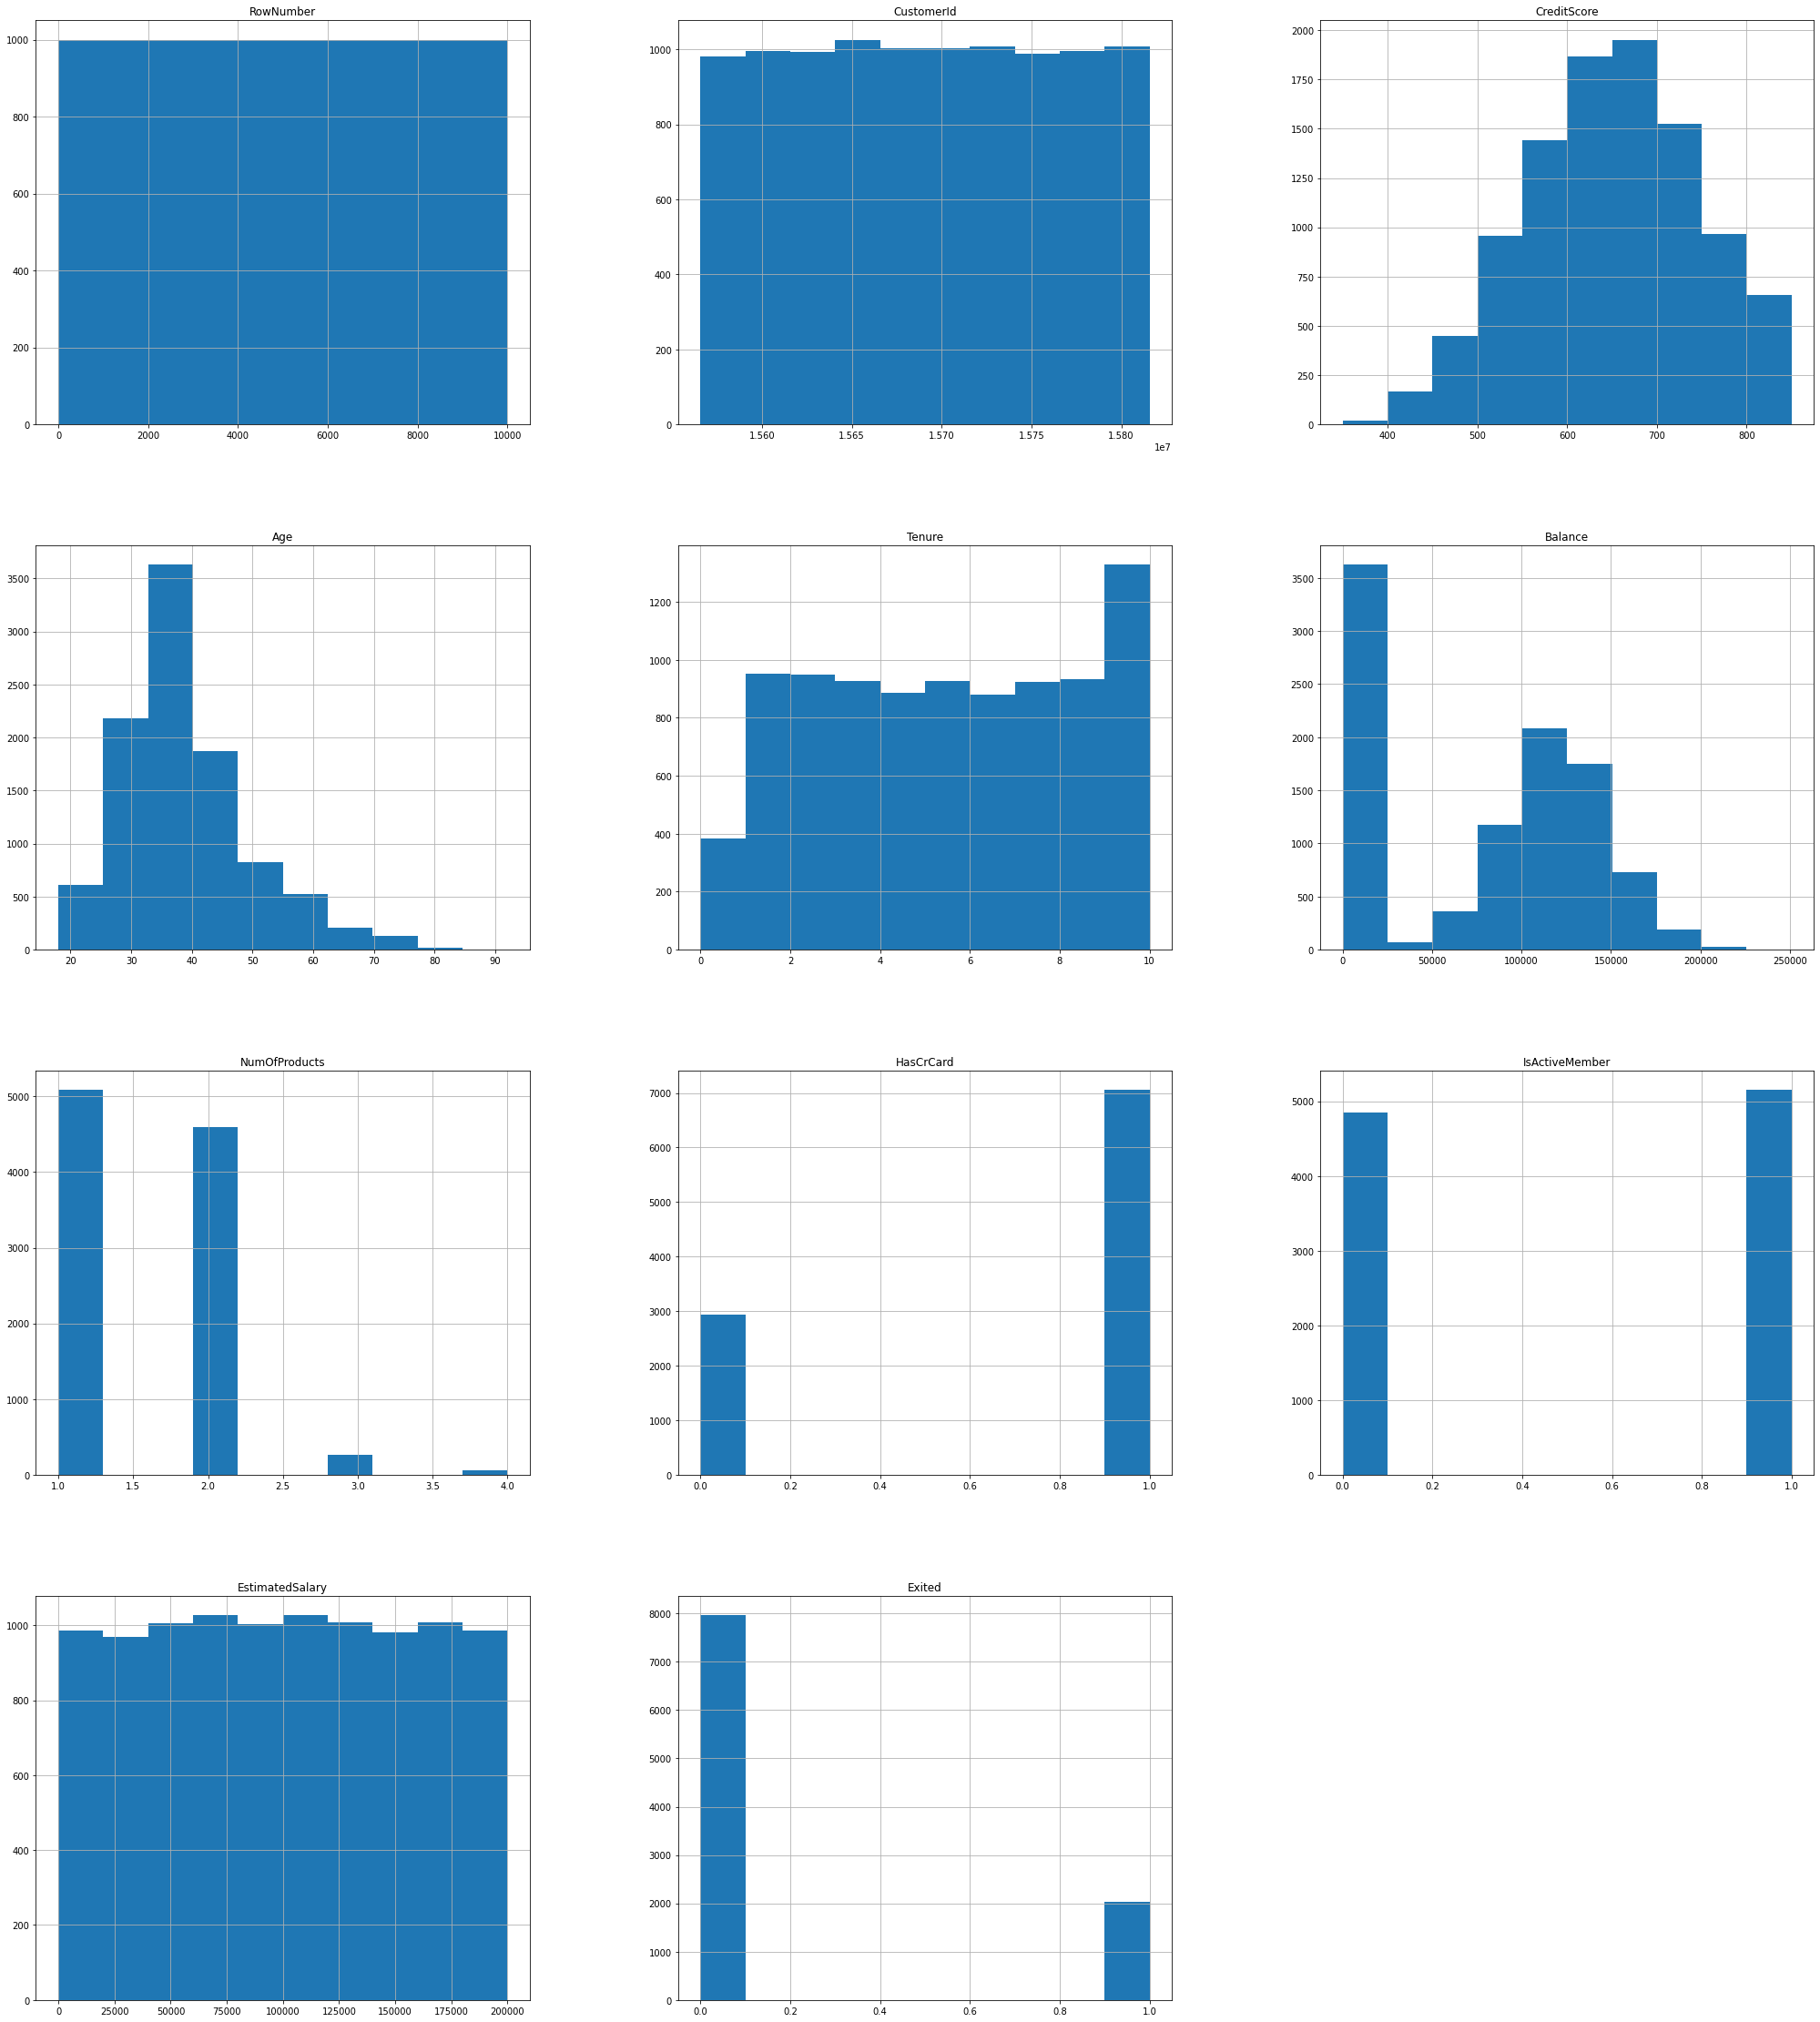

In [185]:
#Exploring histograms of all features in dataset
fig = plt.figure(figsize = (35,40))
ax = fig.gca()
data.hist(ax = ax)

In [186]:
#Exploring vars correlation
cor =data.corr()
attr = cor.iloc[2:-1,2:-1] # all except target and un-needed cols
attr

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965 -0.000062  0.006268       0.012238   
Age                -0.003965  1.000000 -0.013134  0.028308      -0.030680   
Tenure             -0.000062 -0.013134  1.000000 -0.007911       0.011979   
Balance             0.006268  0.028308 -0.007911  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.011979 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.027232 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.032178 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.010520  0.012797       0.014204   

                 HasCrCard  IsActiveMember  EstimatedSalary  
CreditScore      -0.005458        0.025651        -0.001384  
Age              -0.011721        0.085472        -0.007201  
Tenure            0.027232       -0.032178         0.010520  
Balance          -0.014858       -0.010084         0.012797  
NumOfProducts     0.003183        0.009612         0.014204  
HasCrCard         1.000000       -0.011866        -0.009933  
IsActiveMember   -0.011866        1.000000        -0.011421  
EstimatedSalary  -0.009933       -0.011421         1.000000

Heatmap points to  low correlation between the features ...



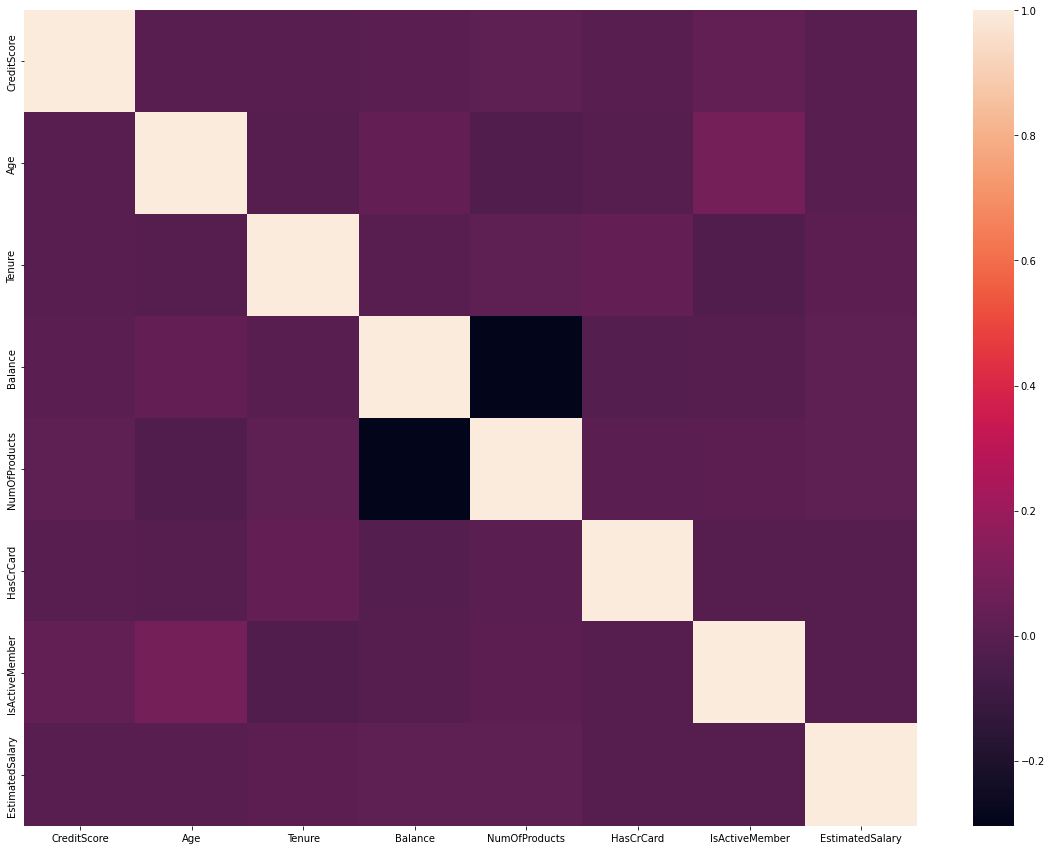

In [187]:
#Exploring corr heatmap
print("Heatmap points to  low correlation between the features ...\n")
plt.figure(figsize = (20,15))
sns.heatmap(attr);

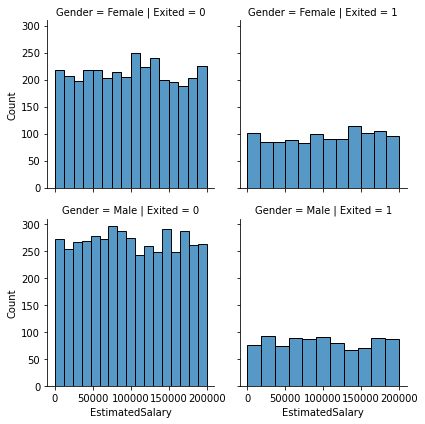

In [188]:
#Exploring salaries feature
g=sns.FacetGrid(data, col = 'Exited', row="Gender")
g.map(sns.histplot, 'EstimatedSalary');


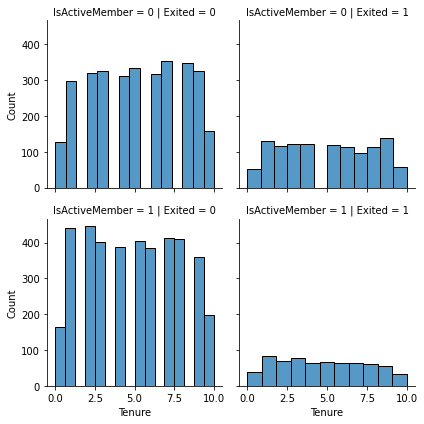

In [189]:
#Exploring tenure
g=sns.FacetGrid(data, col = 'Exited', row="IsActiveMember")
g.map(sns.histplot, 'Tenure');


Class imbalance noted in 'target' set...



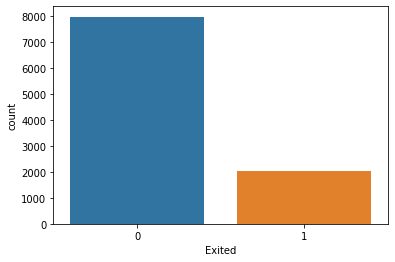

In [190]:
#Exploring +ve, -ve outcomes in the dataset 
print("Class imbalance noted in 'target' set...\n")
sns.countplot(x='Exited',data=data);

#3- Data Cleaning

In [191]:
#Check for nulls

print("Tenure column has some null entries ...\n");
data.isnull().sum()

Tenure column has some null entries ...



RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [192]:
#Replace nulls in tenure column with '0'
data["Tenure"]=data["Tenure"].fillna(0)
#data.isnull().sum()
data["Tenure"].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [193]:
#check for duplicates

print("No duplicates found in data set ...\n");
dp=data[data.duplicated()]
dp.head()

No duplicates found in data set ...



Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

#4- Data Preparation

In [194]:
#Using IMBALANCED classes
#Define features and target set
target="Exited"
drop = ["RowNumber", "CustomerId", "Surname", target] #columns wont be used in the model
X=data.drop(drop, axis=1)
y=data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 10)
y shape: (10000,)


In [195]:
#Feature encoding for the 'Str' type categorical columns
colist = ["Gender", "Geography"]
X = pd.get_dummies(X, columns =colist, drop_first = True)



In [196]:
#Using IMBALANCED classes
#Split into training and test sets
IC_X_train, IC_X_test, ic_y_train, ic_y_test = train_test_split(
    X,y,test_size=0.2,random_state=42, shuffle=True
)

print("Imbalanced classes X_train shape:", IC_X_train.shape)
print("Imbalanced classes y_train shape:", ic_y_train.shape)
print("Imbalanced classes X_test shape:", IC_X_test.shape)
print("Imbalanced classes y_test shape:", ic_y_test.shape)

Imbalanced classes X_train shape: (8000, 11)
Imbalanced classes y_train shape: (8000,)
Imbalanced classes X_test shape: (2000, 11)
Imbalanced classes y_test shape: (2000,)


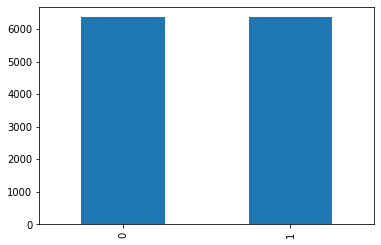

In [197]:
#Method1 - Fixing class IMBALANCE using upsampling

Up1=pd.concat([IC_X_train,ic_y_train],axis=1)


not_exited=Up1[Up1.Exited==0]
exited=Up1[Up1.Exited==1] #minority class

# upsample minority
exits_upsampled = resample(exited,
                          replace=True, # sample with replacement
                          n_samples=len(not_exited), # match number in majority class
                          random_state=42) 

# combine majority and upsampled minority
upsampled = pd.concat([not_exited, exits_upsampled])

# check new class counts
upsampled.Exited.value_counts().plot(kind="bar");
#not_exited.shape

In [198]:
upsampled.head()
upsampled.shape

(12712, 12)

0    6356
1    6356
Name: Exited, dtype: int64

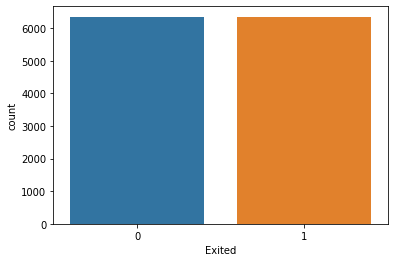

In [199]:
#Method2 -Fix class IMBALANCE using SMOTE

smt = SMOTE(random_state=42)
SM_X_train, sm_y_train = smt.fit_resample(IC_X_train, ic_y_train)
sns.countplot(x=sm_y_train);
sm_y_train.value_counts()

<h3>Balanced Classes Split </h3>

In [200]:
#Method1- UPSAMPLED set ..Split
m1_target="Exited"
M1_X=upsampled.drop(m1_target, axis=1)
m1_y=upsampled[m1_target]

print("M1_X shape:", M1_X.shape)
print("m1_y shape:", m1_y.shape)


M1_X shape: (12712, 11)
m1_y shape: (12712,)


In [201]:
#Using UPSAMPLED class
#Split into training and test sets
M1_X_train, M1_X_test, m1_y_train, m1_y_test = train_test_split(
    M1_X,m1_y,test_size=0.2,random_state=42, shuffle=True
)

print("Upsampled class X_train shape:", M1_X_train.shape)
print("Upsampled class y_train shape:", m1_y_train.shape)
print("Upsampled class X_test shape:", M1_X_test.shape)
print("Upsampled class y_test shape:", m1_y_test.shape)

Upsampled class X_train shape: (10169, 11)
Upsampled class y_train shape: (10169,)
Upsampled class X_test shape: (2543, 11)
Upsampled class y_test shape: (2543,)


In [202]:
#Method2- SMOTE balanced class

#print("SM_X_train shape:", SM_X_train.shape)
#print("sm_y_train shape:", sm_y_train.shape)

#Split into training and test sets
SM_X_train, SM_X_test, sm_y_train, sm_y_test = train_test_split(
    SM_X_train,sm_y_train,test_size=0.2,random_state=42, shuffle=True
)

print("SMOTE class X_train shape:", SM_X_train.shape)
print("SMOTE class y_train shape:", sm_y_train.shape)
print("SMOTE class X_test shape:", SM_X_test.shape)
print("SMOTE class y_test shape:", sm_y_test.shape)

SMOTE class X_train shape: (10169, 11)
SMOTE class y_train shape: (10169,)
SMOTE class X_test shape: (2543, 11)
SMOTE class y_test shape: (2543,)


<h3>Feature Scaling</h3>

In [203]:
sc = StandardScaler()
IC_X_train= pd.DataFrame(sc.fit_transform(IC_X_train))
IC_X_test= pd.DataFrame(sc.transform(IC_X_test))

M1_X_train= pd.DataFrame(sc.fit_transform(M1_X_train))
M1_X_test= pd.DataFrame(sc.transform(M1_X_test))

SM_X_train= pd.DataFrame(sc.fit_transform(SM_X_train))
SM_X_test= pd.DataFrame(sc.transform(SM_X_test))


In [204]:
#SM_X_train.head()
#M1_X_train.head()
IC_X_train.head()

0         1         2         3         4         5         6   \
0  0.356500 -0.655786  0.473076 -1.218471  0.808436  0.649203  0.974817   
1 -0.203898  0.294938 -0.172706  0.696838  0.808436  0.649203  0.974817   
2 -0.961472 -1.416365 -0.495597  0.618629 -0.916688  0.649203 -1.025834   
3 -0.940717 -1.131148  1.441749  0.953212 -0.916688  0.649203 -1.025834   
4 -1.397337  1.625953  1.441749  1.057449 -0.916688 -1.540351 -1.025834   

         7         8         9         10  
0  1.367670  0.913248 -0.579467 -0.576388  
1  1.661254  0.913248  1.725723 -0.576388  
2 -0.252807  0.913248 -0.579467  1.734942  
3  0.915393 -1.094993 -0.579467 -0.576388  
4 -1.059600  0.913248 -0.579467 -0.576388

#5- Data Modelling

In [205]:
#Calculate baseline 
acc_baseline = ic_y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.7945


In [206]:
#set classifier
clf = RandomForestClassifier(random_state=42)

In [207]:
#Create grid for hyperparameter search test
params = {
    "n_estimators": range(25,101,25),
    "max_depth": range(10,51,10)
}
params

{'n_estimators': range(25, 101, 25), 'max_depth': range(10, 51, 10)}

In [208]:
#Create gridSearch model ...
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)

#6- Model Evaluation

In [209]:
# Model tester function
def eval(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)

  #Gather Model results
  # Extract best hyperparameters
  bp = model.best_params_

  #Calculate training and test accuracy scores for the model
  score_train = model.score(xtrain, ytrain)
  score_test = model.score(xtest, ytest)
  y_pred= model.predict(xtest)
  a_score=accuracy_score(ytest, y_pred)
  f1=f1_score(ytest,y_pred)

  result = [bp, score_train, score_test, a_score,f1]

  return result

In [210]:
#Test original imbalanced classes 
icr = eval(model, IC_X_train, ic_y_train, IC_X_test, ic_y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [211]:
# Train model using UPSAMPLED CLASS
m1r = eval(model, M1_X_train, m1_y_train, M1_X_test, m1_y_test)
m1r

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[{'max_depth': 30, 'n_estimators': 50},
 1.0,
 0.9602831301612269,
 0.9602831301612269,
 0.9601891998423335]

In [212]:
# Train model using SMOTE CLASS
smr = eval(model, SM_X_train, sm_y_train, SM_X_test, sm_y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


<h3> Exploring other models' performance ....</h3>

In [213]:
##Testing model - Logistic Regression 
clf_lr=LogisticRegression(random_state=42)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_lr = GridSearchCV(clf_lr, parameters,cv=10,verbose=1,n_jobs=-1)

In [214]:
#1-Imbalanced data
ic_lrr = eval(model_lr, IC_X_train, ic_y_train, IC_X_test, ic_y_test)
ic_lrr

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[{'C': 0.8}, 0.811375, 0.8105, 0.8105, 0.28893058161350843]

In [215]:
#2-Upsampled data
m1_lrr = eval(model_lr, M1_X_train, m1_y_train, M1_X_test, m1_y_test)
m1_lrr

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[{'C': 0.8},
 0.7031173173370047,
 0.7038930397168698,
 0.7038930397168698,
 0.6981963927855711]

In [216]:
#3-SMOTE data
sm_lrr = eval(model_lr, SM_X_train, sm_y_train, SM_X_test, sm_y_test)
sm_lrr

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[{'C': 0.8},
 0.7737240633297277,
 0.7864726700747149,
 0.7864726700747149,
 0.7814889336016096]

In [217]:
##Testing Support Vector Machine model
clf_svm=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,1.2],'degree':[3,6]}
model_svm = GridSearchCV(clf_svm, parameters,cv=10,verbose=1,n_jobs=-1)


In [218]:
#1-Imbalanced data
ic_svm = eval(model_svm, IC_X_train, ic_y_train, IC_X_test, ic_y_test)
ic_svm

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[{'C': 0.8, 'degree': 3, 'kernel': 'rbf'},
 0.864,
 0.8565,
 0.8565,
 0.5094017094017095]

In [219]:
#2-Upsampled data
m1_svm = eval(model_svm, M1_X_train, m1_y_train, M1_X_test, m1_y_test)
m1_svm

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[{'C': 1.2, 'degree': 6, 'kernel': 'poly'},
 0.8732422067066575,
 0.8399528116397955,
 0.8399528116397955,
 0.8335378323108384]

In [220]:
#3-SMOTE data
sm_svm = eval(model_svm, SM_X_train, sm_y_train, SM_X_test, sm_y_test)
sm_svm

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[{'C': 1.2, 'degree': 3, 'kernel': 'rbf'},
 0.8473792899990166,
 0.8407392843098702,
 0.8407392843098702,
 0.836231298018601]

#7- Findings and Recommendations

In [232]:
#Print model score reports
index = ["bestparams", "training score", "test score", "accuracy score","f1 score"]
cols = ["Imbalanced[RFC]", "Upsampled[RFC]", "Smote[RFC]","Imbalanced[LRG]", "Upsampled[LRG]", "Smote[LRG]","Imbalanced[SVM]", "Upsampled[SVM", "Smote[SVM"]
res = [icr, m1r, smr,ic_lrr, m1_lrr, sm_lrr,ic_svm, m1_svm, sm_svm]

stat={}
for i in range(len(res)):
  stat[f"Score-{cols[i]}"] = res[i]


statDf=pd.DataFrame(
      stat
    )
    
statDf.index=index

statDf


Score-Imbalanced[RFC]  \
bestparams      {'max_depth': 10, 'n_estimators': 100}   
training score                                0.897875   
test score                                       0.865   
accuracy score                                   0.865   
f1 score                                      0.567308   

                                 Score-Upsampled[RFC]  \
bestparams      {'max_depth': 30, 'n_estimators': 50}   
training score                                    1.0   
test score                                   0.960283   
accuracy score                               0.960283   
f1 score                                     0.960189   

                                      Score-Smote[RFC] Score-Imbalanced[LRG]  \
bestparams      {'max_depth': 30, 'n_estimators': 100}            {'C': 0.8}   
training score                                     1.0              0.811375   
test score                                    0.871412                0.8105   
accuracy score                                0.871412                0.8105   
f1 score                                      0.869043              0.288931   

               Score-Upsampled[LRG] Score-Smote[LRG]  \
bestparams               {'C': 0.8}       {'C': 0.8}   
training score             0.703117         0.773724   
test score                 0.703893         0.786473   
accuracy score             0.703893         0.786473   
f1 score                   0.698196         0.781489   

                                   Score-Imbalanced[SVM]  \
bestparams      {'C': 0.8, 'degree': 3, 'kernel': 'rbf'}   
training score                                     0.864   
test score                                        0.8565   
accuracy score                                    0.8565   
f1 score                                        0.509402   

                                      Score-Upsampled[SVM  \
bestparams      {'C': 1.2, 'degree': 6, 'kernel': 'poly'}   
training score                                   0.873242   
test score                                       0.839953   
accuracy score                                   0.839953   
f1 score                                         0.833538   

                                         Score-Smote[SVM  
bestparams      {'C': 1.2, 'degree': 3, 'kernel': 'rbf'}  
training score                                  0.847379  
test score                                      0.840739  
accuracy score                                  0.840739  
f1 score                                        0.836231

In [233]:
#Plot the confusion matric of best model
print("The best performing model is Upsampled RandomForestClassifier with below performance parameters: ")
r=pd.DataFrame(pd.Series(m1r))
r.index=index
r

The best performing model is Upsampled RandomForestClassifier with below performance parameters: 


0
bestparams      {'max_depth': 30, 'n_estimators': 50}
training score                                    1.0
test score                                   0.960283
accuracy score                               0.960283
f1 score                                     0.960189

In [234]:
#Analyze confusion matrix
m1_y_test.value_counts()

0    1303
1    1240
Name: Exited, dtype: int64

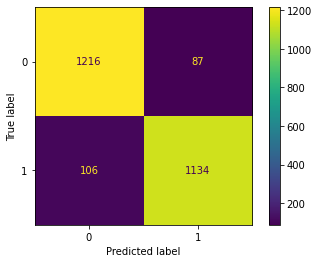

In [235]:
#Plot confusion matrix 
ConfusionMatrixDisplay.from_estimator(model, M1_X_test, m1_y_test)

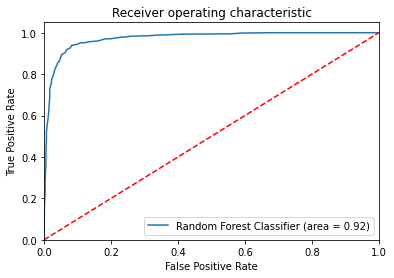

In [236]:
#Plot AUC-ROC chart and compare with F1

#Model ROC curve
m1Rfc_roc_auc = roc_auc_score(m1_y_test, model.predict(M1_X_test))
fpr, tpr, thresholds = roc_curve(m1_y_test, model.predict_proba(M1_X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % m1Rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

<h3>Summary</h3>

The Upsampled Random Forest Classifier model met and exceeded the success threshold of > .59 <br>
<b>Model F1 score was: 0.960189 </b><br>
<b>Model AUC score was: 0.92. </b> It was almost a perfect classifier...<br>
In all cases the imbalanced class data resulted in poor performing model when contrasted with the upsampled and smote datasets